### Diabetes Prediction


The aim of this project is to predict the presence of diabetes in patients based on their medical records. The project analyzes the patients' medical records to calculate the prediction of whether a patient has diabetes or not.


### Data Dictionary

Features in the Dataset and Meaning

- gender: Male, Female and other
- age: age in years
- hypertension: 0 = no, 1 = yes
- heart disease: 0 = no, 1 = yes
- smoking_history: No Info, current, former, ever, not current
- bmi: 10.01-95.69Kg/m2 (<18.5 Underweight, 18.5-24.9 Healthy weight, 25-29.9 Overweight, >30 Obese)
- HbA1c_level: 3.5-9.0% ( Avg recent blood glucose levels: Non-diabetic 3.5 - 6.0%, Diabetic 6.0 - 9.0% )
- blood_glucose_level: 80-300mg/dl (levels of blood sugar: <100 mg/dl-Normal, 100-125 mg/dl-Prediabetes, >126 mg/dl-Diabetes)
- diabetes - 0 = no, 1 = yes




In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv(r"C:\Users\Helen Ojo\Downloads\diabetes_prediction_dataset.csv")
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


## Data Preprocessing

In [3]:
df.shape

(100000, 9)

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
# Numerical Statistical Analysis
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [9]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
age_group              0
dtype: int64

In [13]:
df[df.isnull().any(axis=1)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group


### Exploratory Data Analysis
In the exploratory data analysis, I will be comprehending and analyzing the data to find the relationship between the features and the target variable. I will begin with looking at the distribution of data across all the variables. Then I will look at the relationship between the features and the target variable.


#### Categorize age into group

In [13]:
def age_group(x):
    if x <= 12:
        return "0-12 Child"
    elif x <= 19:
        return "13-19 Adolescent"
    elif x <= 30:
        return "20-30 Young Adult"
    elif x <= 40:
        return "31-40 Adult"
    elif x <= 55:
        return "41-55 Old Adult"
    elif x <= 65:
        return "56-65 Senior Adult"
        
    else:
        return ">=66 Elder"
# Apply function to data
df["age_group"] = df["age"].apply(age_group)
df.head(2)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight,>=66 Elder
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight,41-55 Old Adult


#### Count of age group

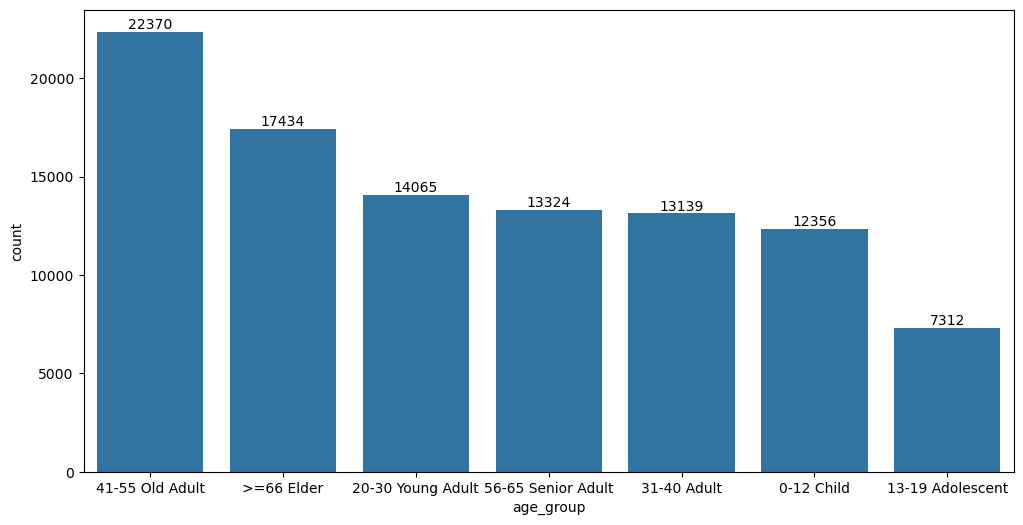

In [78]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x=df["age_group"], order=df["age_group"]. value_counts(ascending=False).index)
# To add value label
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0],labels=values);

The majority of patients are above 31 years of age, this means that the dataset is towards patient of Adult age.

#### Categorise BMI

In [24]:
def bmi_category(x):
    if x <= 18.4:
        return "Underweight"
    elif x <= 24.9:
        return "Healthy weight"
    elif x <= 29.9:
        return "Overweight"
    
        
    else:
        return "Obese"
# Apply function to data
df["bmi_category"] = df["bmi"].apply(bmi_category)
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight,>=66 Elder
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight,41-55 Old Adult


#### Count of BMI Category

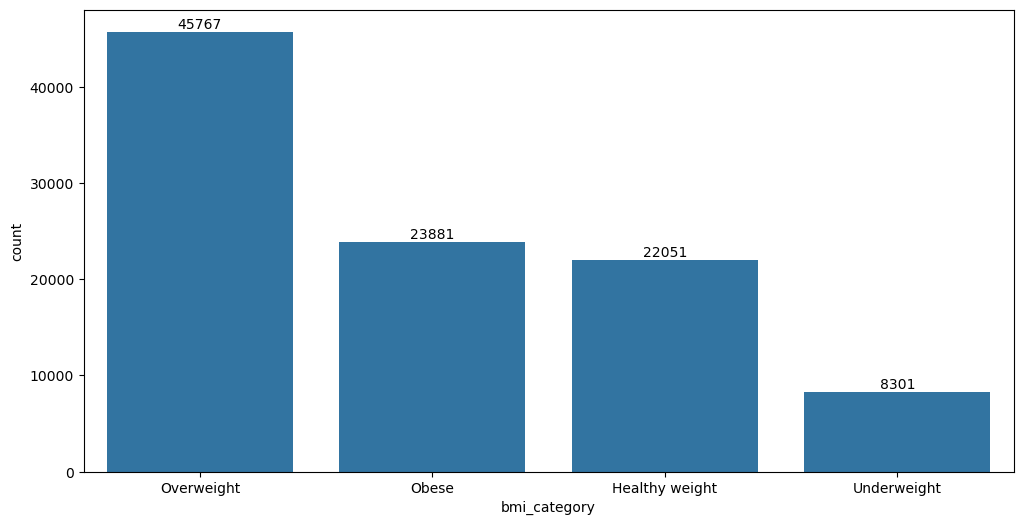

In [25]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x=df["bmi_category"], order=df["bmi_category"]. value_counts(ascending=False).index)
# To add value label
values = df["bmi_category"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0],labels=values);

The majority of the patients are overweight and less patient are underweight.

#### Categorise HbA1c level

In [26]:
def HbA1c_category(x):
    if x <= 5.9:
        return "non-diabetic "
    
    else:
        return " diabetic"
# Apply function to data
df["HbA1c_category"] = df["HbA1c_level"].apply(HbA1c_category)
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category,age_group,HbA1c_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight,>=66 Elder,diabetic
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight,41-55 Old Adult,diabetic


#### Count of HbA1c Category

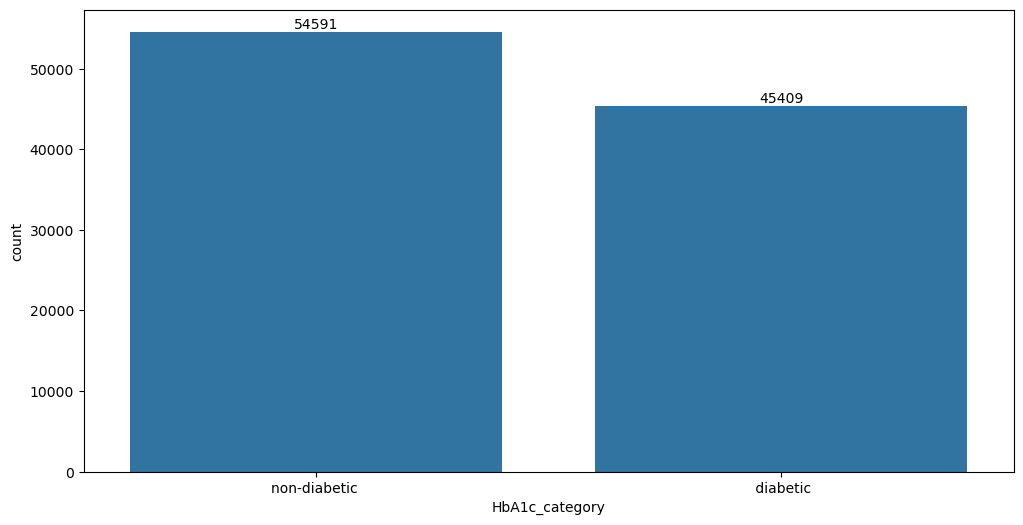

In [27]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x=df["HbA1c_category"], order=df["HbA1c_category"]. value_counts(ascending=False).index)
# To add value label
values = df["HbA1c_category"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0],labels=values);

The HbA1c level of the patient are nearly divided in half, till non-diabetic has the highest

#### Categorise Blood glucose level

In [30]:
def blood_glucose_category(x):
    if x <= 99:
        return "Normal"
    elif x <= 125:
        return "Prediabetes"
    
        
    else:
        return "Diabetes"
# Apply function to data
df["blood_glucose_category"] = df["blood_glucose_level"].apply(blood_glucose_category)
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category,age_group,HbA1c_category,blood_glucose_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight,>=66 Elder,diabetic,Diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight,41-55 Old Adult,diabetic,Normal


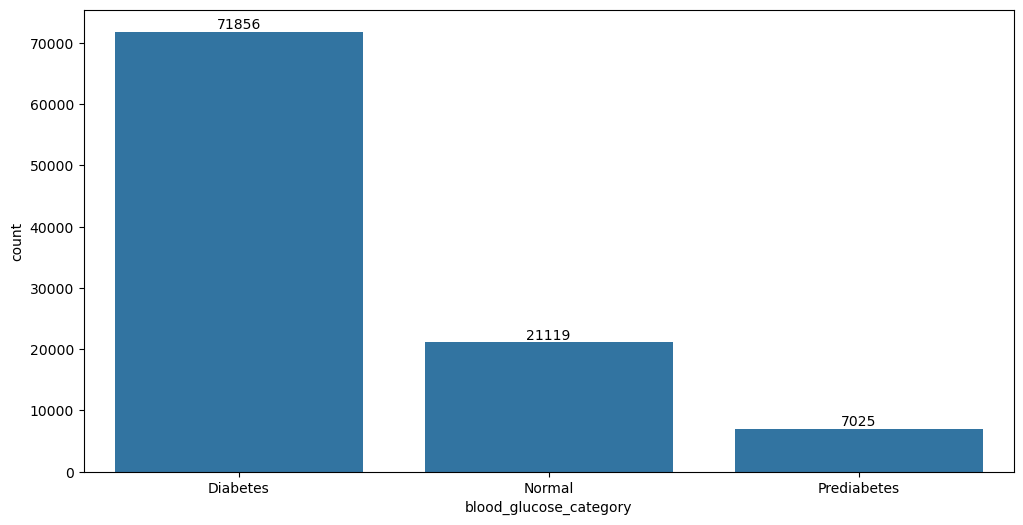

In [31]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x=df["blood_glucose_category"], order=df["blood_glucose_category"]. value_counts(ascending=False).index)
# To add value label
values = df["blood_glucose_category"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0],labels=values);

The majority of patients are diabetic, they have there blood glucose level at 126mg/dl or above.

#### Categorical Data

In [79]:
categorical_data = df.select_dtypes(include="object")
categorical_data.head(3)

,gender,smoking_history,bmi_category,age_group,HbA1c_category,blood_glucose_category
0,Female,never,Overweight,>=66 Elder,diabetic,Diabetes
1,Female,No Info,Overweight,41-55 Old Adult,diabetic,Normal
2,Male,never,Overweight,20-30 Young Adult,non-diabetic,Diabetes


In [6]:
categorical_columns = categorical_data.columns

#### Count of gender

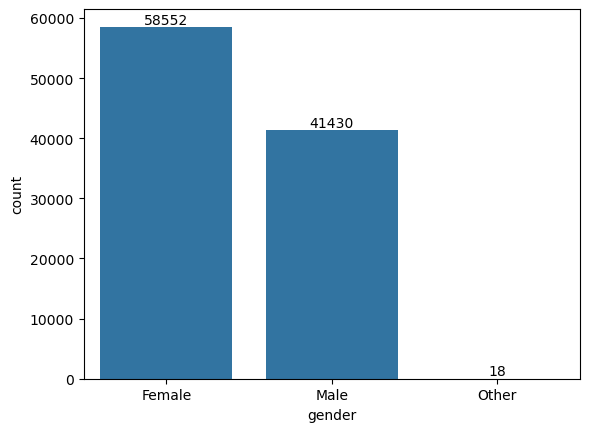

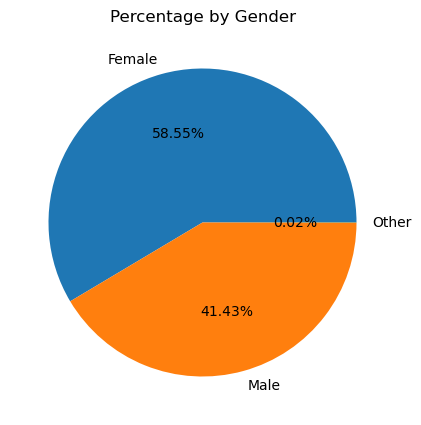

In [17]:

ax = sns.countplot(x=df["gender"], order=df["gender"]. value_counts(ascending=False).index)
# To add value label
values = df["gender"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0],labels=values);

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["gender"]) # Column name
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage by Gender") # chart title
plt.show();

From the pie chart, it is clear that majority of patients are female with 58.55% followed by males with 41.43% and lastly, other with 0.02 

#### Count of diabetic patient

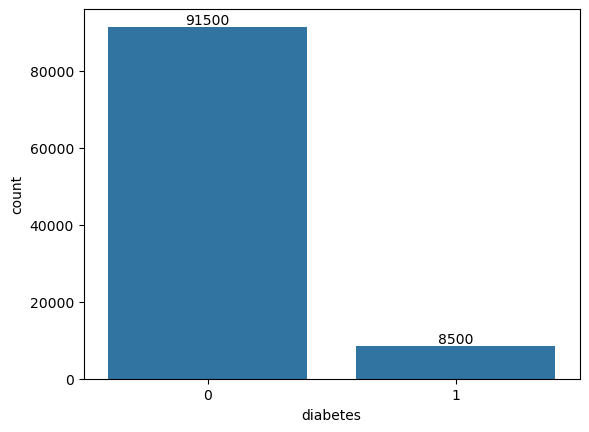

In [155]:
ax = sns.countplot(x=df["diabetes"], order=df["diabetes"].value_counts(ascending=False).index)
values = df["diabetes"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0],labels=values);

The distribution of diabetes dataset, it is clear that patient with no diabetes are majority and those with diabetes are significantly low.

#### Count of Patient Smoking-History

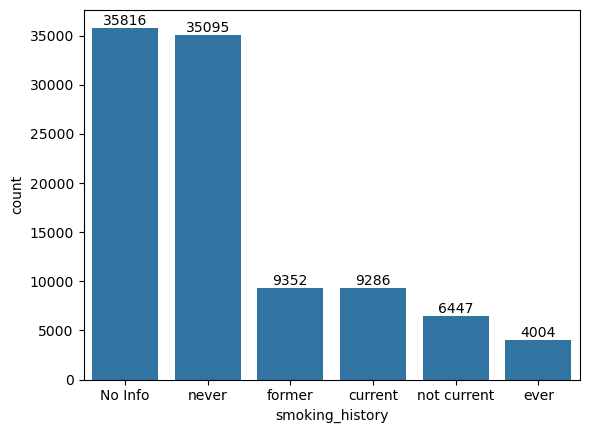

In [18]:

ax = sns.countplot(x=df["smoking_history"], order=df["smoking_history"].value_counts(ascending=False).index)
# To add value label
values = df["smoking_history"].value_counts(ascending=False).values
ax.bar_label(container =ax.containers[0],labels=values);

The chart of smoking history shows patients with no info has the highest this implies that detailed patient lifestyle information is unknown and the second majority are patients with never. 


### Bivairate Analysis

#### Target Variable and Independent Variables Visualization

#### Analyse other Features with Diabetes

In [32]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'bmi_category',
       'age_group', 'HbA1c_category', 'blood_glucose_category'],
      dtype='object')

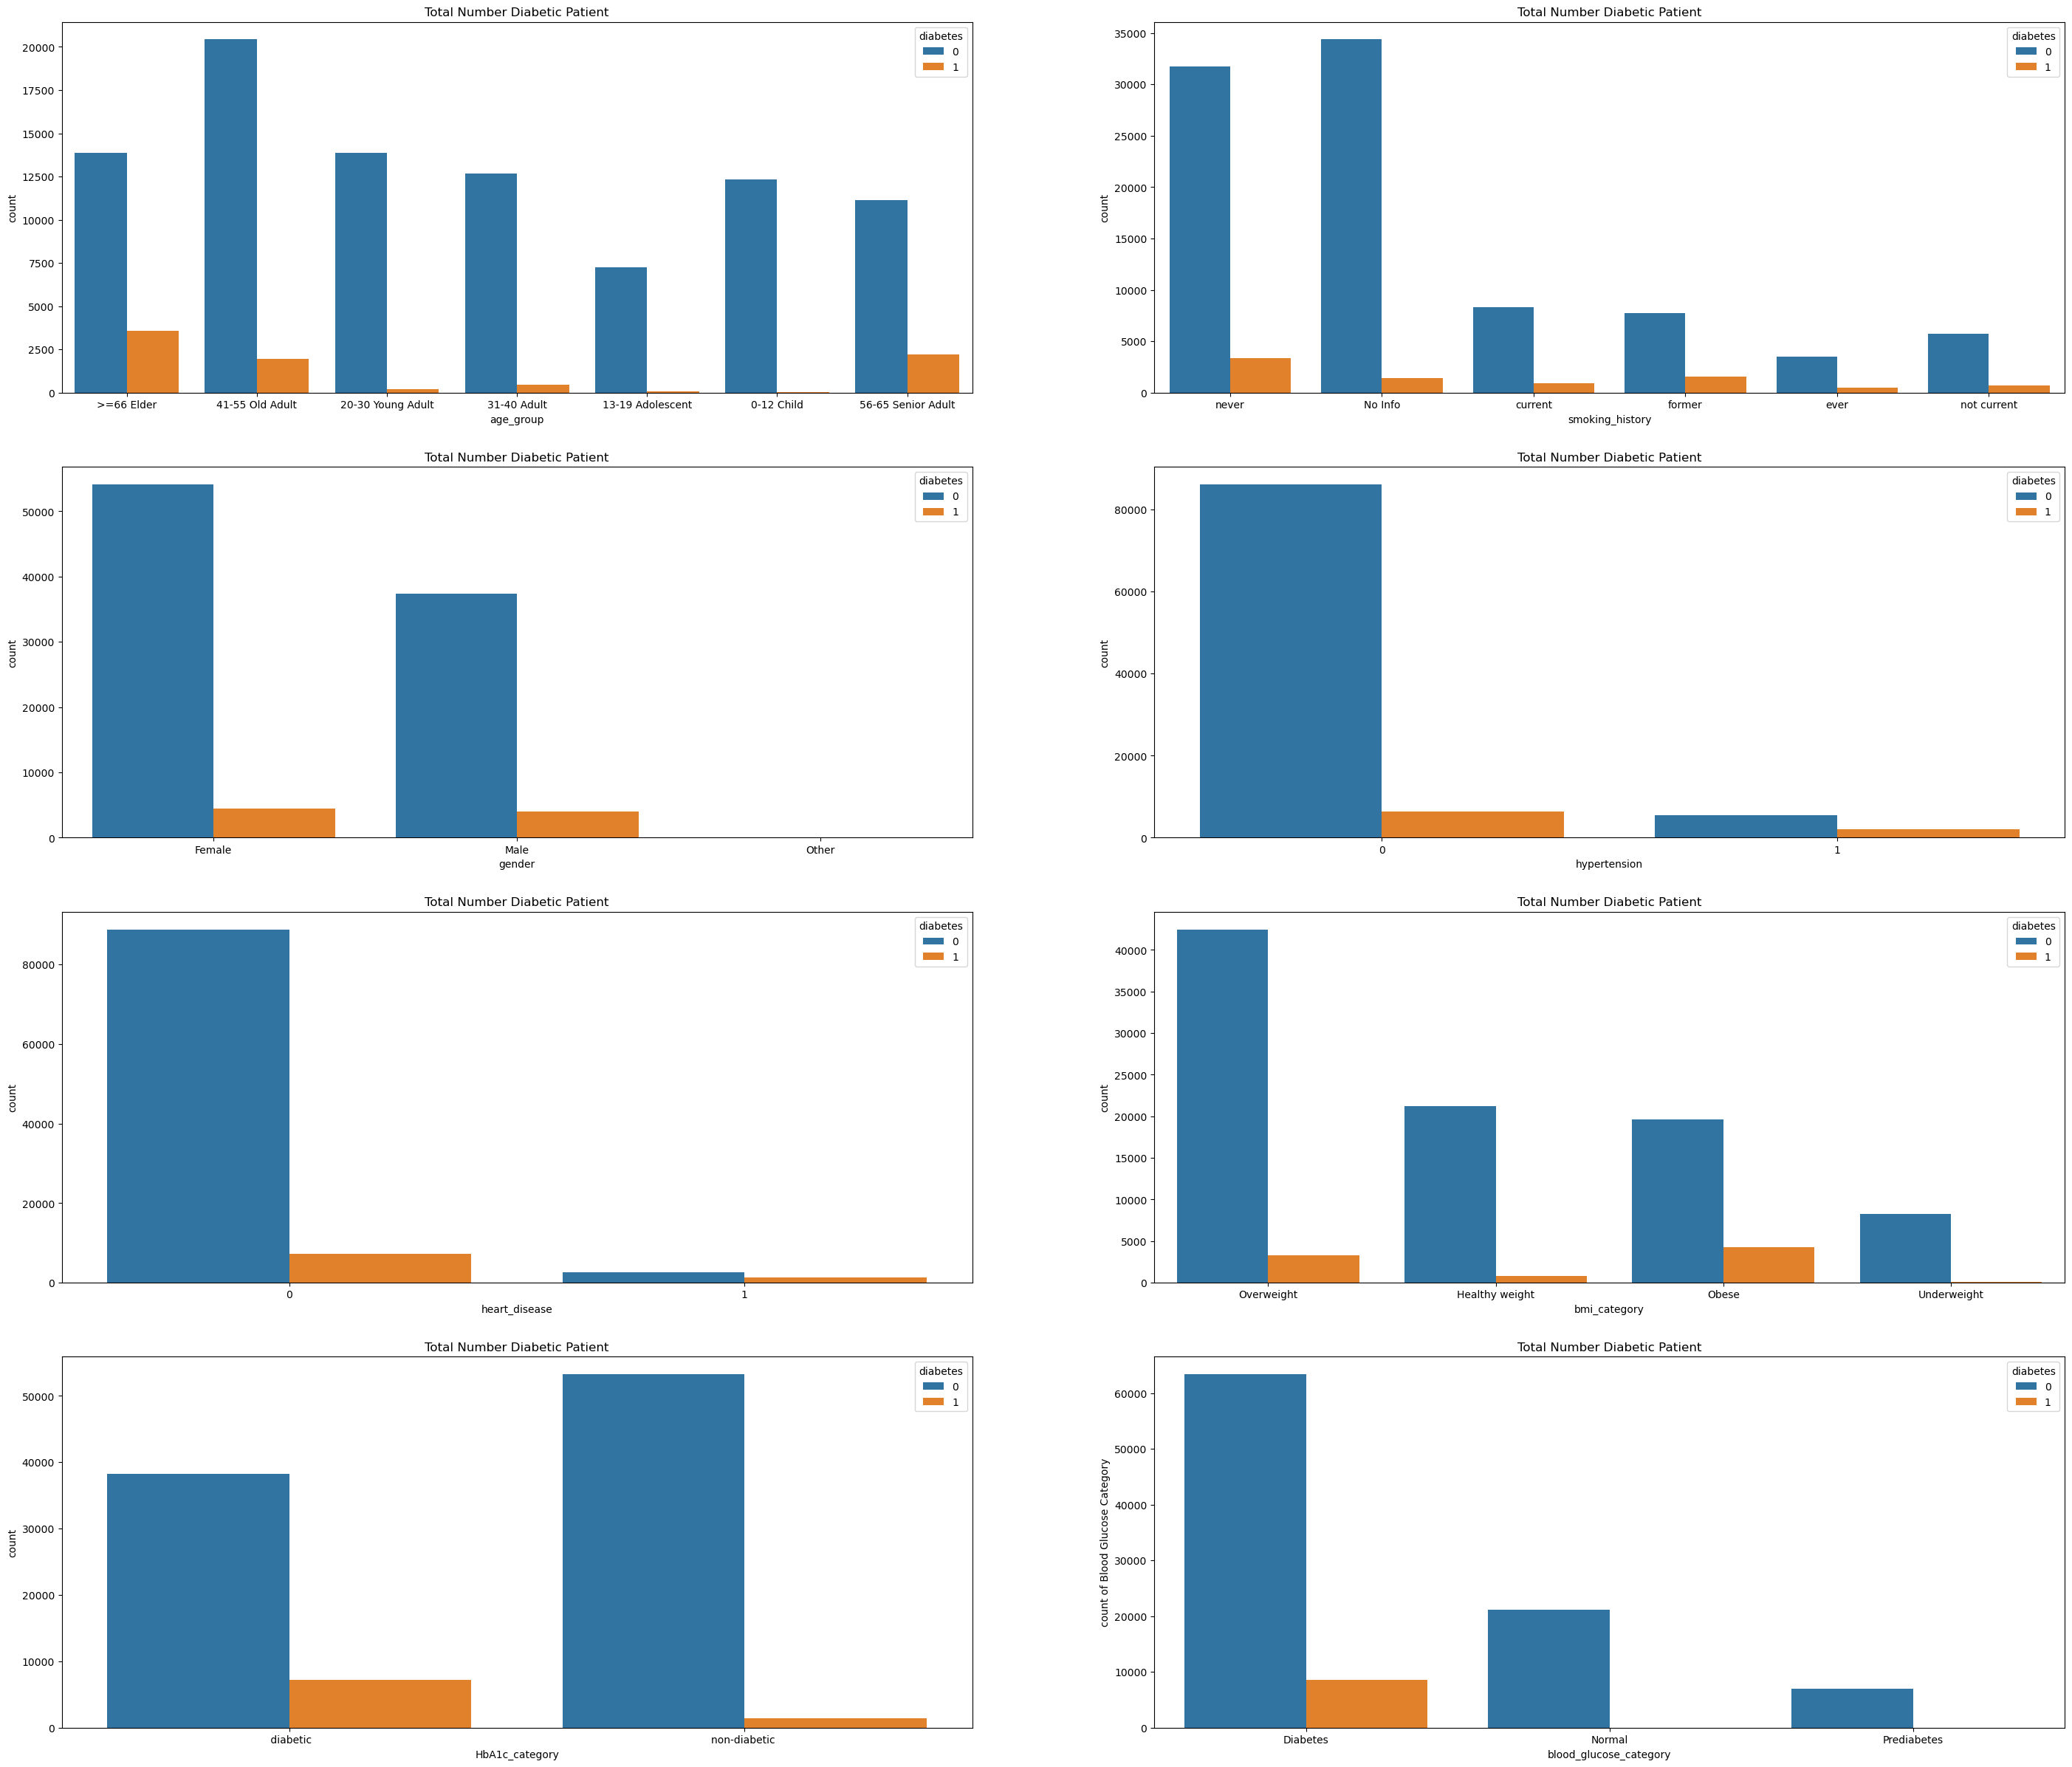

In [33]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(35,30))


sns.countplot(x='age_group', data=df, hue='diabetes', ax=axs[0,0])
plt.xlabel('Age Group')
plt.ylabel('count of Age Group')
axs[0,0].set_title("Total Number Diabetic Patient")

sns.countplot(x='smoking_history', data=df, hue='diabetes' , ax=axs[0,1])
plt.xlabel('Smoking History')
plt.ylabel('count of Smoking History')
axs[0,1].set_title("Total Number Diabetic Patient")


sns.countplot(x='gender', data=df, hue='diabetes', ax=axs[1,0])
plt.xlabel('Gender')
plt.ylabel('count of Gender')
axs[1,0].set_title("Total Number Diabetic Patient")


sns.countplot(x='hypertension', data=df, hue='diabetes', ax=axs[1,1])
plt.xlabel('hypertension')
plt.ylabel('count of hypertension')
axs[1,1].set_title("Total Number Diabetic Patient")


sns.countplot(x='heart_disease', data=df, hue='diabetes',ax=axs[2,0])
plt.xlabel('heart_disease')
plt.ylabel('count of heart_disease')
axs[2,0].set_title("Total Number Diabetic Patient")


sns.countplot(x='bmi_category', data=df, hue='diabetes', ax=axs[2,1])
plt.xlabel('bmi_category')
plt.ylabel('count of bmi Category')
axs[2,1].set_title("Total Number Diabetic Patient")


sns.countplot(x='HbA1c_category', data=df, hue='diabetes',ax=axs[3,0])
plt.xlabel('HbA1c_category')
plt.ylabel('count of HbA1c Category')
axs[3,0].set_title("Total Number Diabetic Patient")

sns.countplot(x='blood_glucose_category', data=df, hue='diabetes', ax=axs[3,1])
plt.xlabel('blood_glucose_category')
plt.ylabel('count of Blood Glucose Category')
axs[3,1].set_title("Total Number Diabetic Patient");

These graphs visualize patient's medical history and its relation with heart disease. 
- The age group above 66 years has the highest count of diabetes cases (1) while the lowest is in the 0-12 age group meaning the prevalence of diabetes tends to increase progressively with age.
- Individuals with a smoking history of "Never" have the highest count of diabetes, the distribution suggests that there other factors beyond smoking
- The gender of patient with diabetes are closely distributed; gender is not a contributor to having diabetes
- The 0 group in hypertension and heart disease dominates in terms of both diabetes (1) and non-diabetes (0) counts, other factors might contribute to diabetes prevalence.
- Individuals with HbA1c levels ranging from 5.7% to 9.0%  are highly indicative of diabetes or prediabetes.
- Blood glucose levels ranging from 126 mg/dL to 300 mg/dL indicate uncontrolled diabetes or acute glucose dysregulation.


#### Numerical Data

In [58]:
df1=df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'bmi_category',
       'age_group', 'HbA1c_category', 'blood_glucose_category']]


In [60]:
df1.drop(['age_group','bmi_category','blood_glucose_category','HbA1c_category'], axis=1, inplace=True)
df1.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


### Numerical Data Distribution

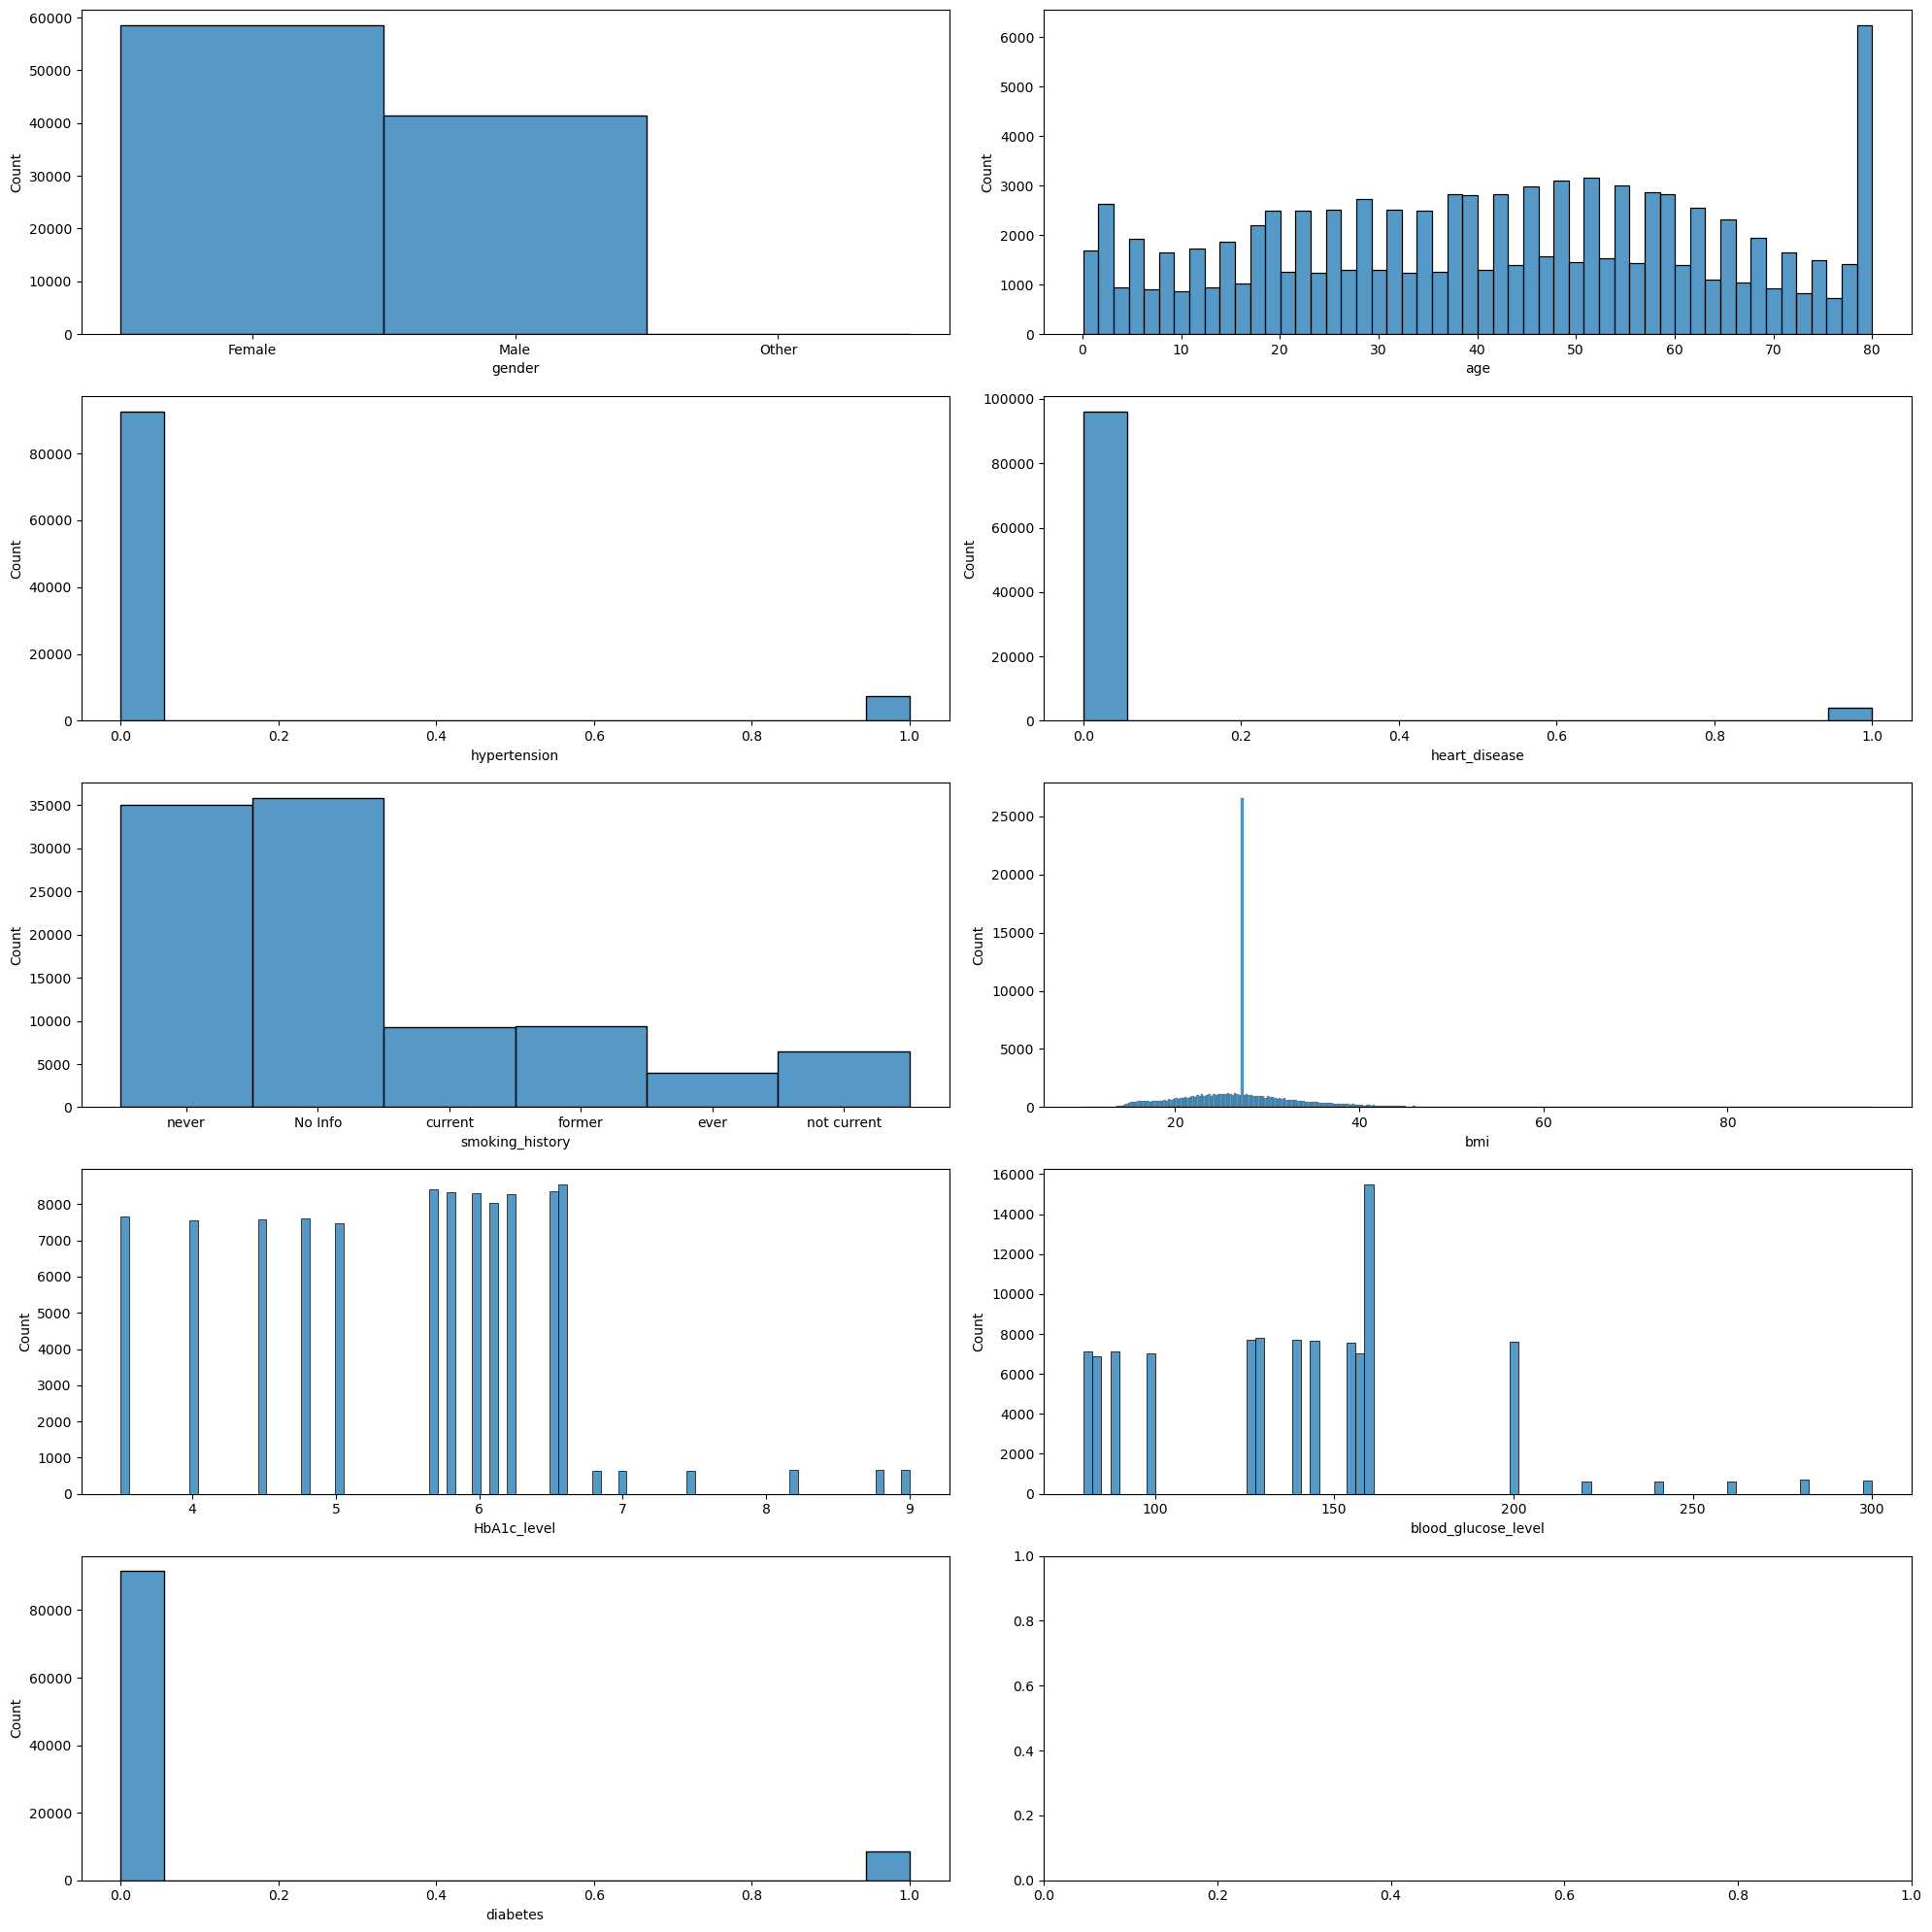

In [61]:
fig, position = plt.subplots(nrows=5, ncols=2, figsize =(20, 20))
position = position.flatten()
for index, column_name in enumerate(df1):
    sns.histplot(x=df1[column_name], ax=position[index])

plt.tight_layout()
plt.show()

#### Outliner check

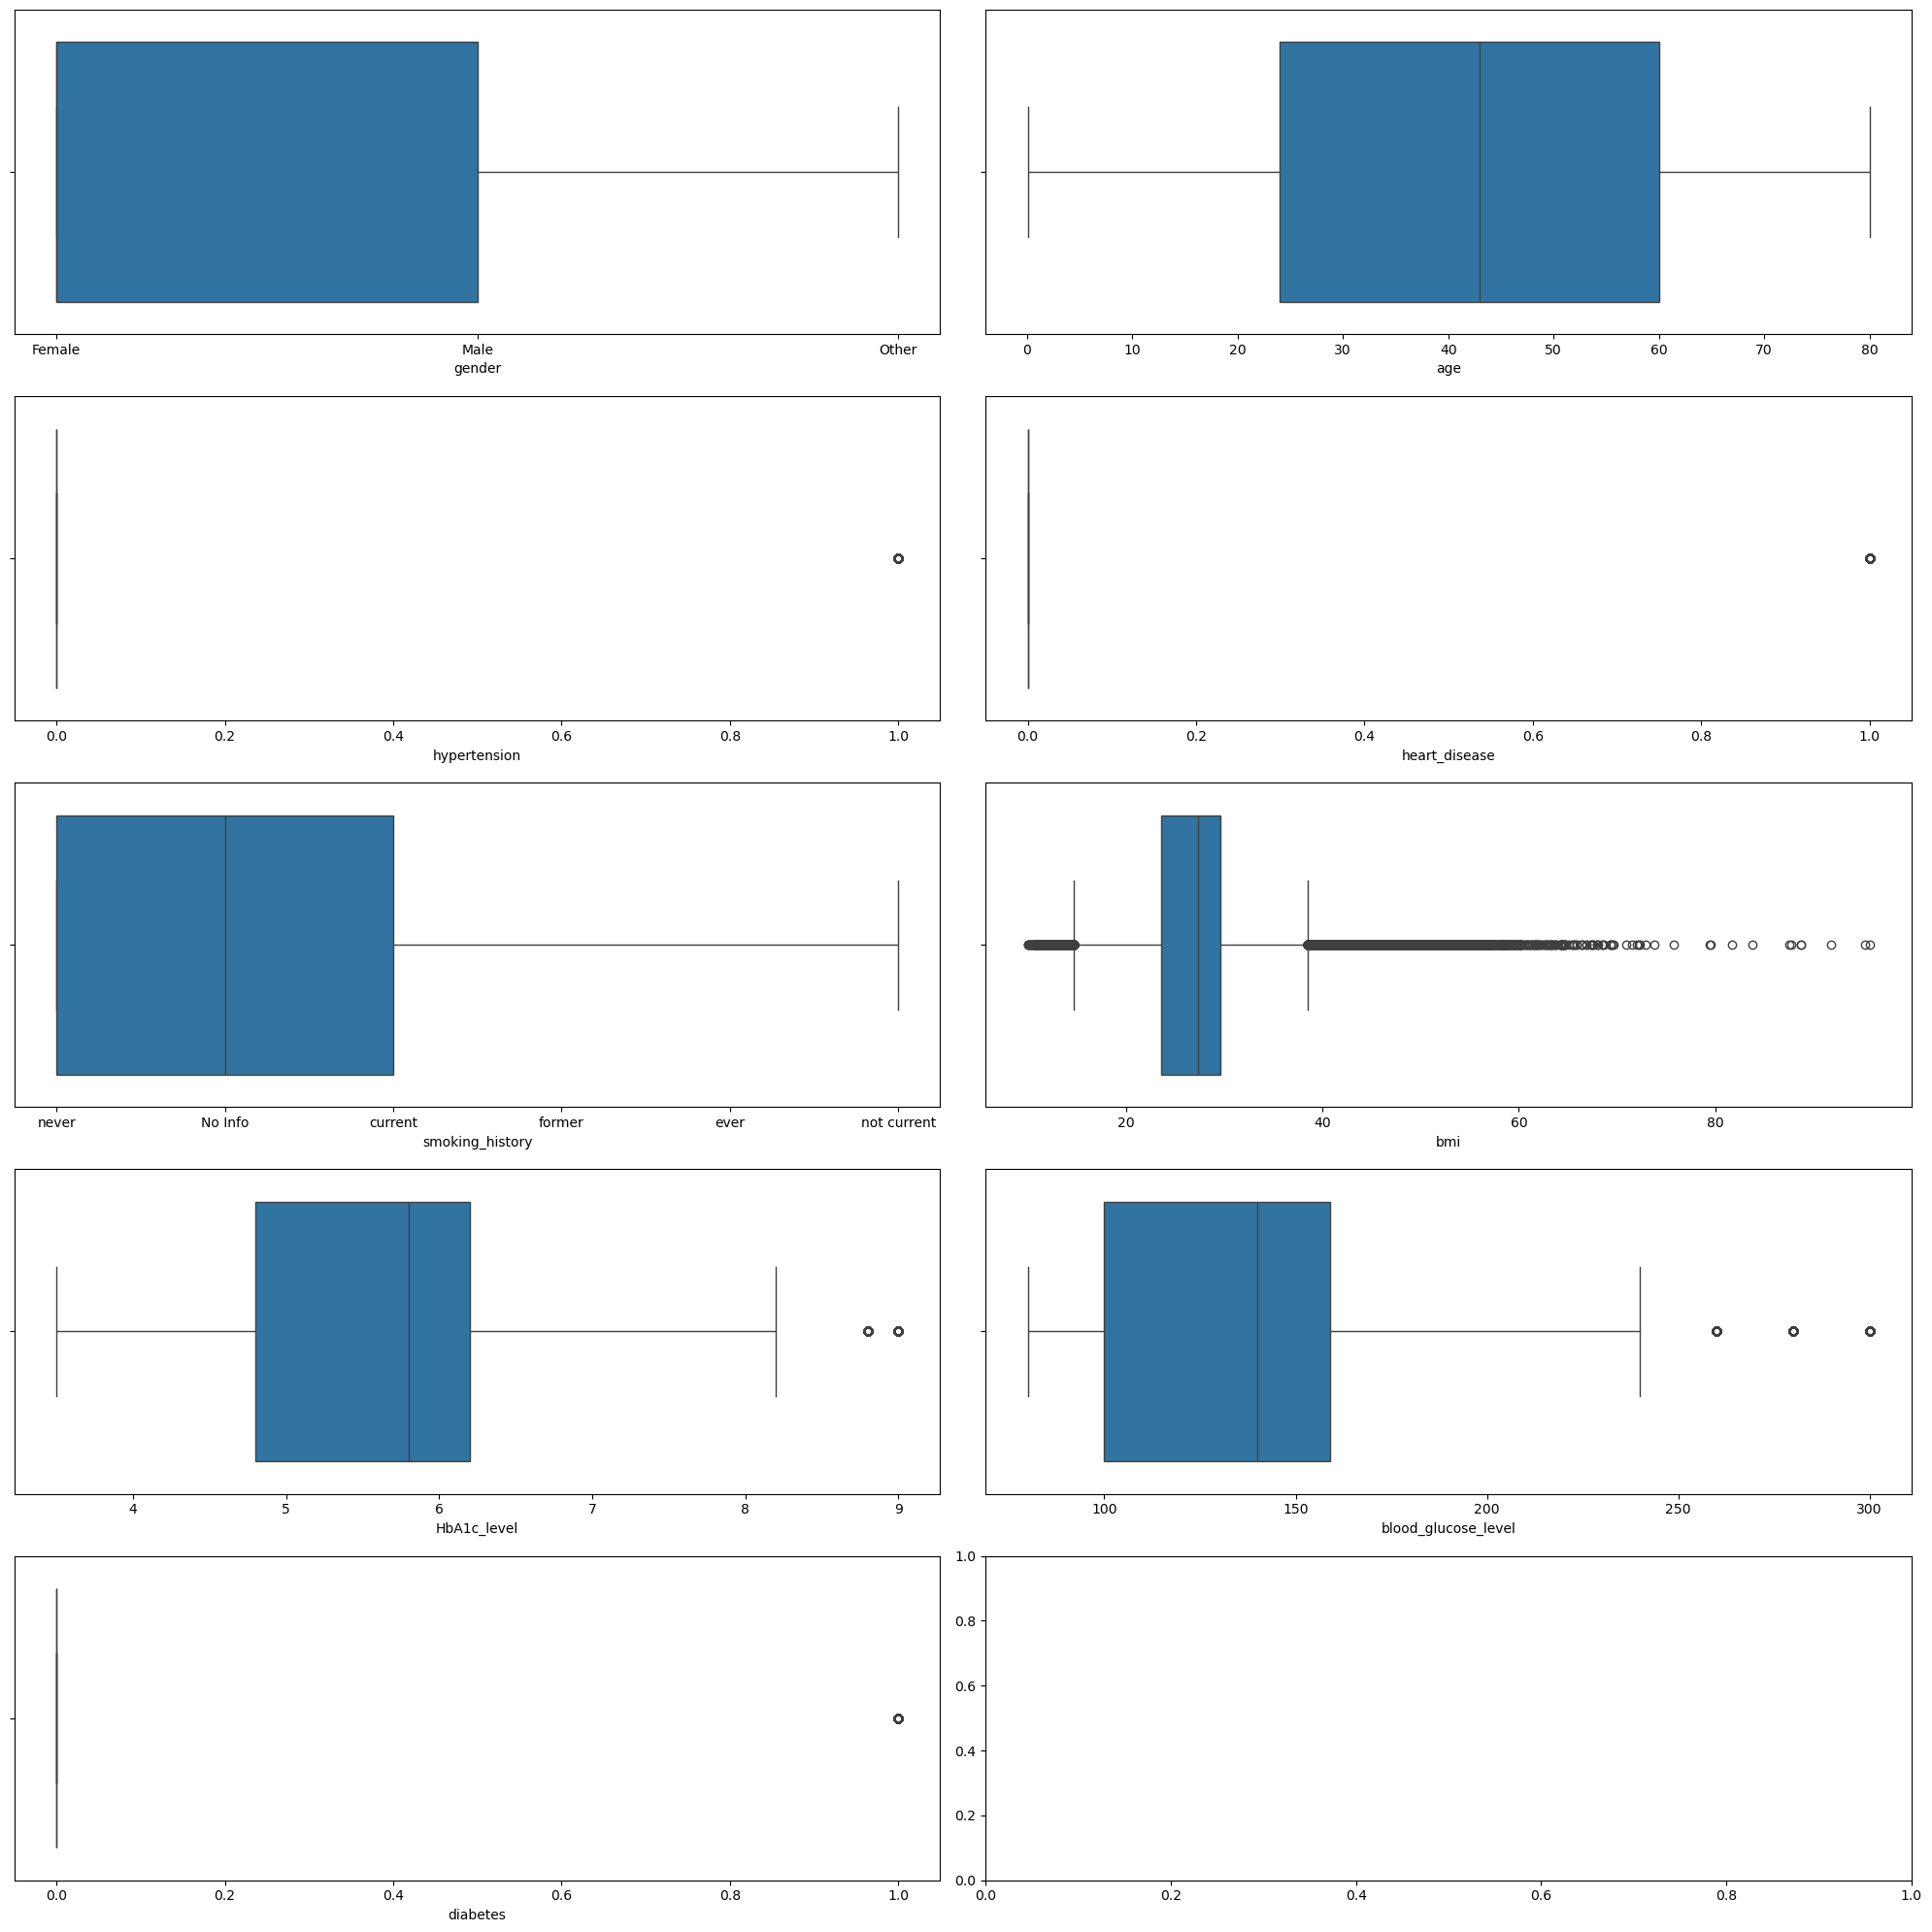

In [62]:
fig, position = plt.subplots(nrows=5, ncols=2, figsize =(20, 20))
position = position.flatten()
for index, column_name in enumerate(df1):
    sns.boxplot(x=df1[column_name], ax=position[index])

plt.tight_layout()
plt.show()

#### Check Correlation between other features with Diabetes

In [67]:
df2=df1[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]


In [ ]:
encoder = LabelEncoder()

In [68]:
for column_name in df2:
    df2[column_name] = encoder.fit_transform(df2[column_name])

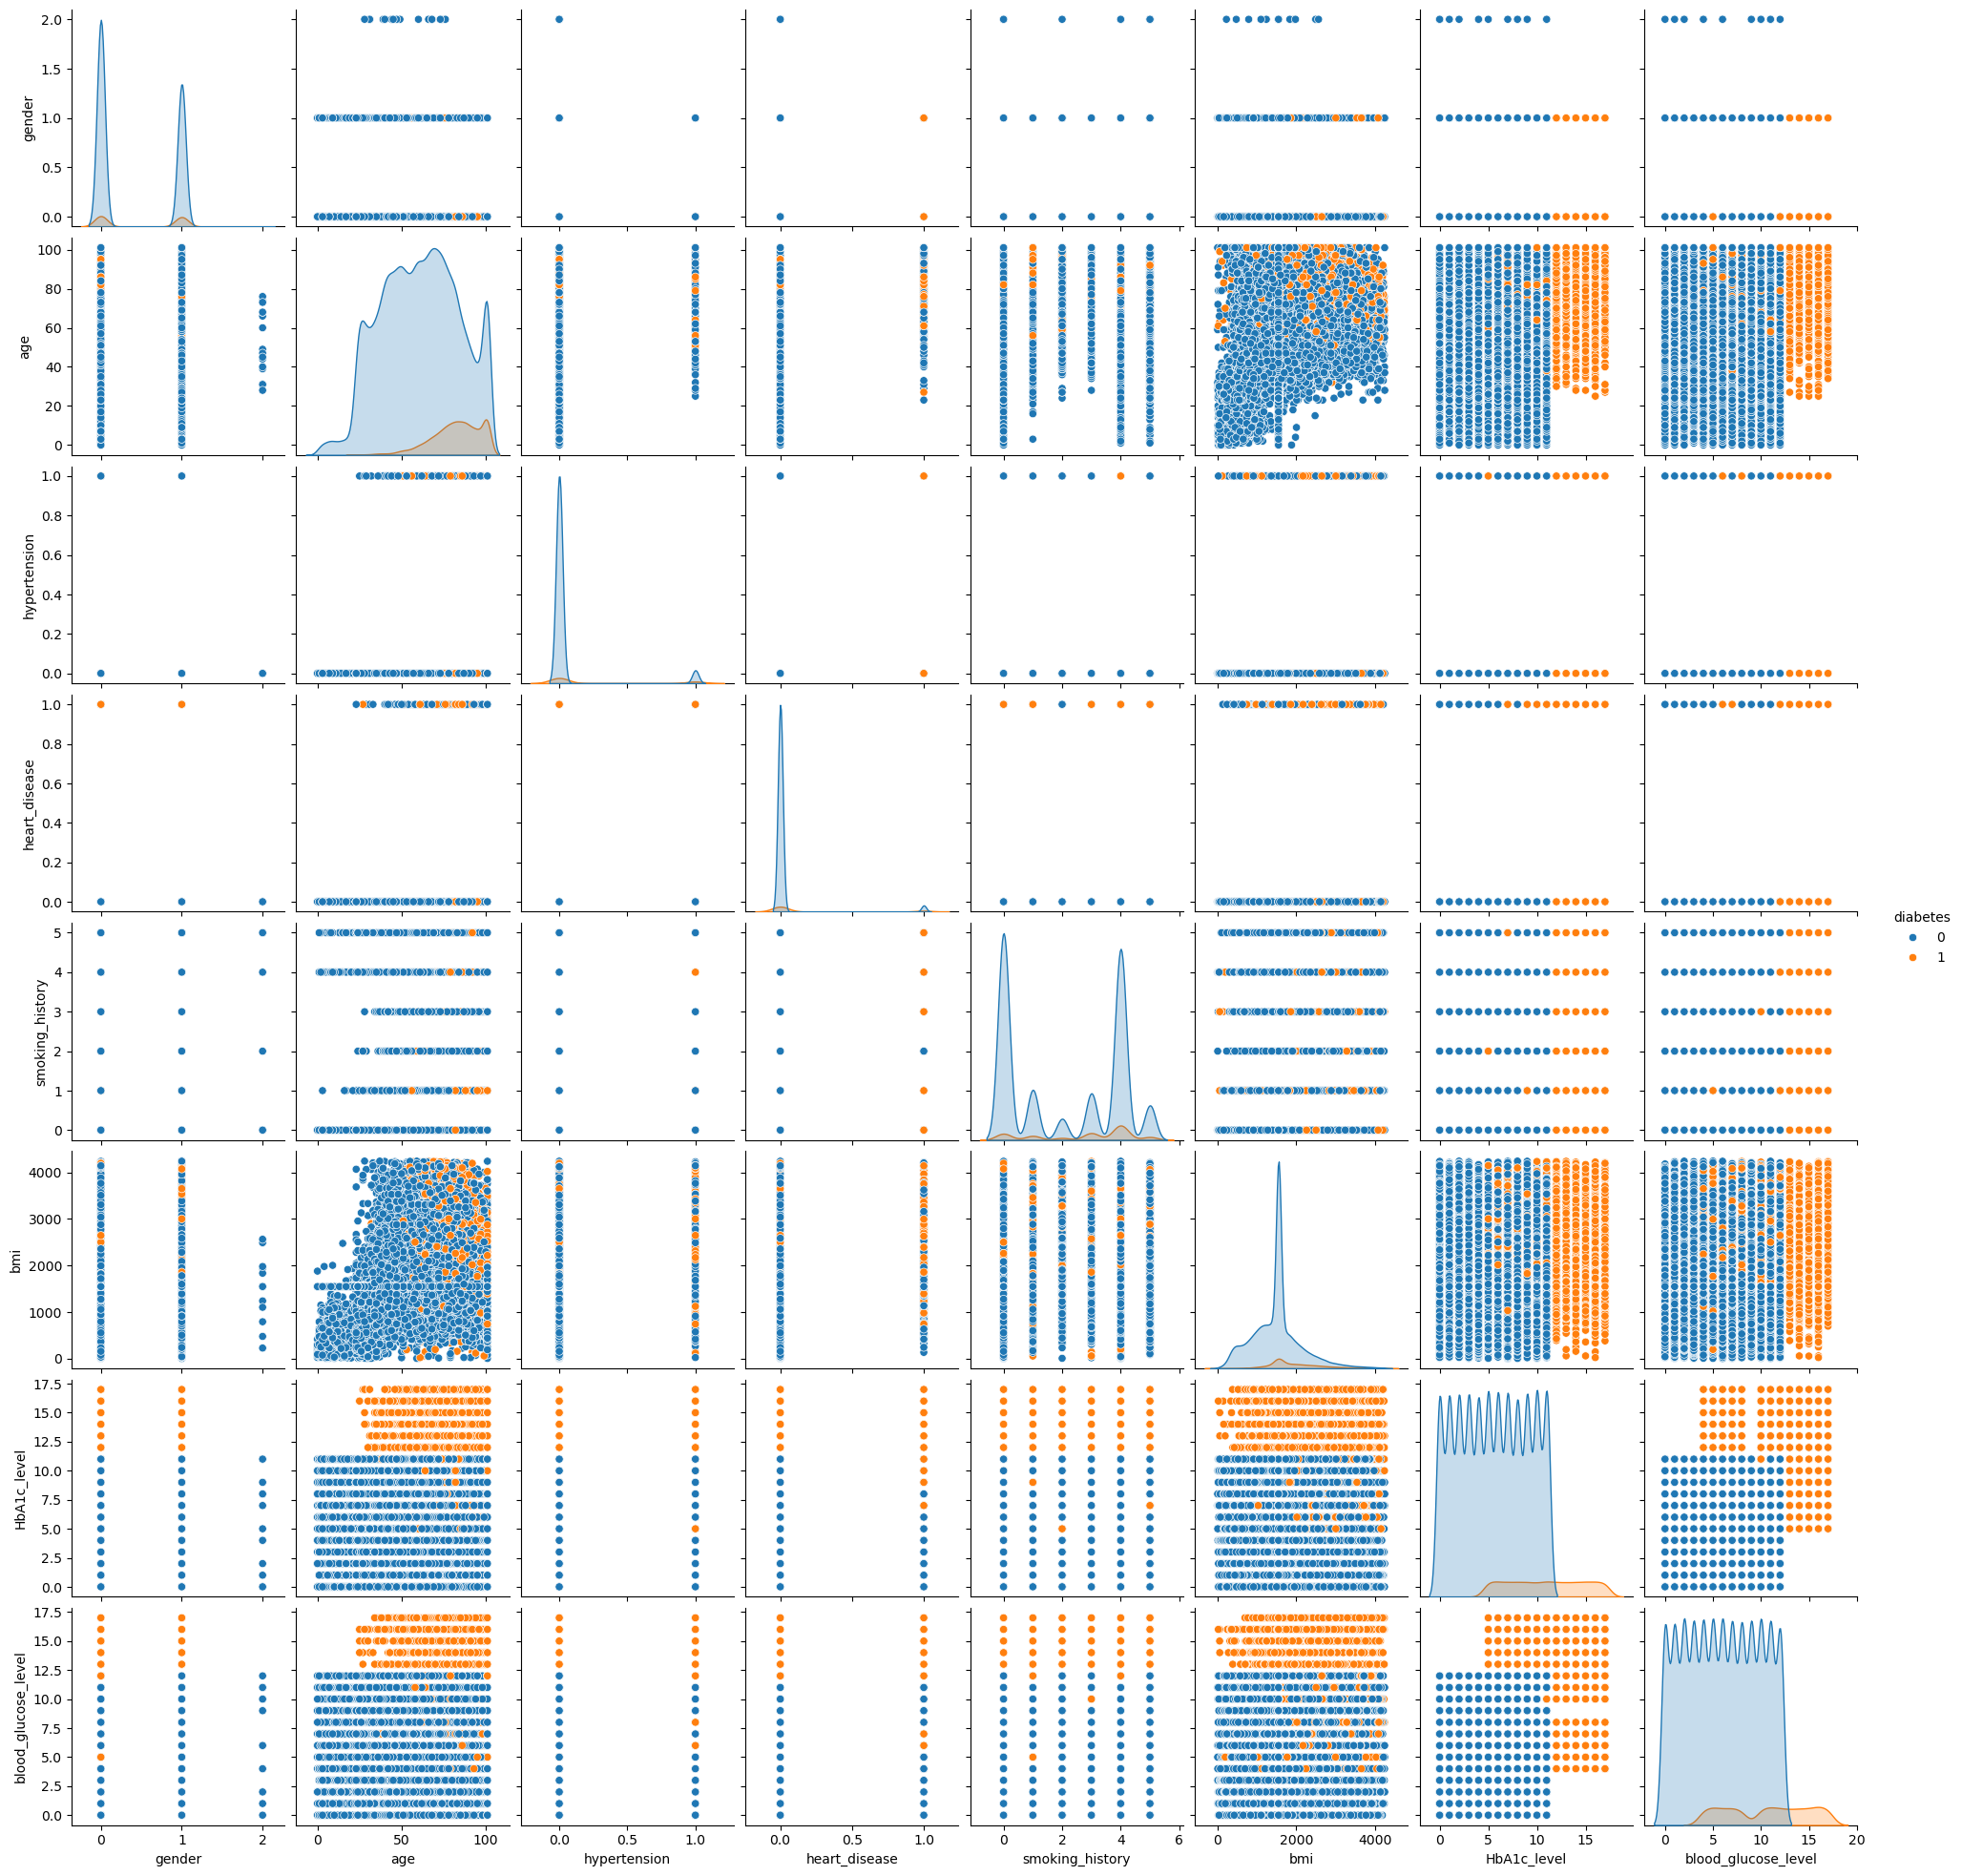

In [69]:
sns.pairplot(df2, hue='diabetes');

This show the distribution position of diabetes amongst other variables and relationship with each other

#### Features Correlation

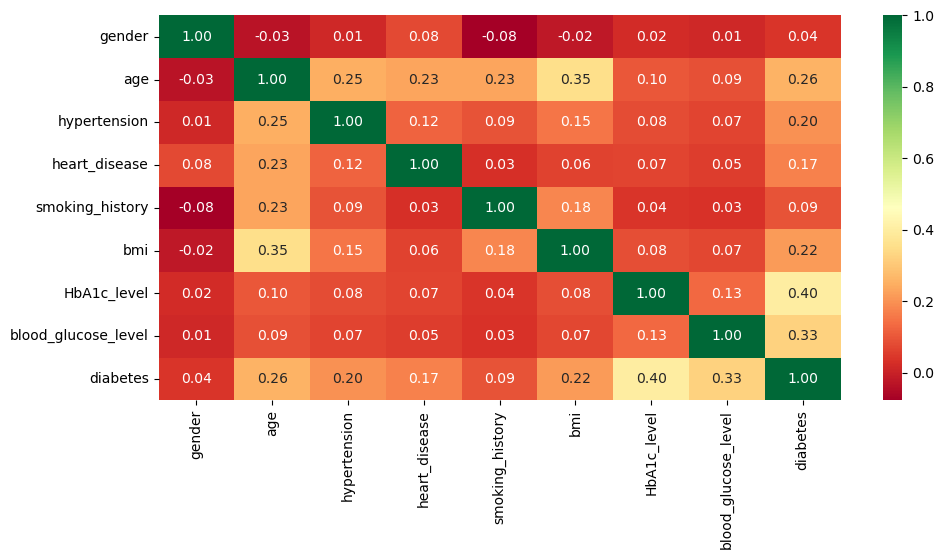

In [74]:
correlation_map = df2.corr()
plt.figure(figsize = (11,5))
sns.heatmap(correlation_map, annot=True, cmap = 'RdYlGn', fmt=".2f");

Amongst the variables there is a strong coorelation between diabetes and HbAIc laevel followed by diabetes and blood-glucose level.



In [70]:
data=df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'bmi_category',
       'age_group', 'HbA1c_category', 'blood_glucose_category']]

In [71]:
data.drop(['age_group','bmi_category','HbA1c_category','blood_glucose_category'], axis=1, inplace=True)
data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


#### Encode object to integer

In [75]:
encoder = LabelEncoder()

In [76]:
for column_name in data:
    data[column_name] = encoder.fit_transform(data[column_name])

In [77]:
data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,101,0,1,4,1334,11,6,0
1,0,75,0,0,0,1547,11,0,0


#### Label Separation

In [12]:
label = data["diabetes"]

In [13]:
data1 = data.drop("diabetes", axis=1)

#### Scaling

In [14]:
# Intialise the scaler
scaler = MinMaxScaler()

# Fit and transform the data_data 
normalized_data= scaler.fit_transform(data1)

print("Normalized Data (Min-Max Scaling):")
print(normalized_data)

Normalized Data (Min-Max Scaling):
[[0.         1.         0.         ... 0.31417805 0.64705882 0.35294118]
 [0.         0.74257426 0.         ... 0.36434291 0.64705882 0.        ]
 [0.5        0.48514851 0.         ... 0.36434291 0.29411765 0.52941176]
 ...
 [0.5        0.86138614 0.         ... 0.37635422 0.29411765 0.47058824]
 [0.         0.44554455 0.         ... 0.55511069 0.05882353 0.17647059]
 [0.         0.77227723 0.         ... 0.24917569 0.64705882 0.11764706]]


#### Split data to train and test

In [21]:
x_train, x_test, y_train, y_test = train_test_split(normalized_data, label, test_size =0.2, random_state=42) 

In [16]:
len(x_train) == len(y_train)

True

#### Model Training and Evaluation

<-- XGB Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



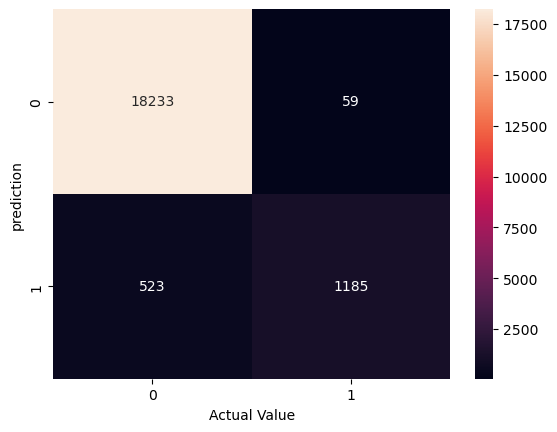

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.80      0.55      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.88      0.77      0.81     20000
weighted avg       0.95      0.95      0.95     20000



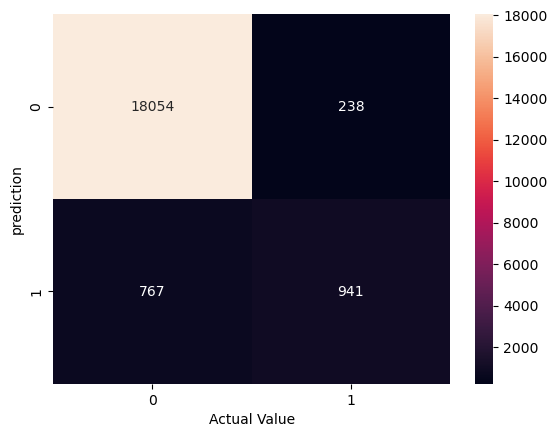

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



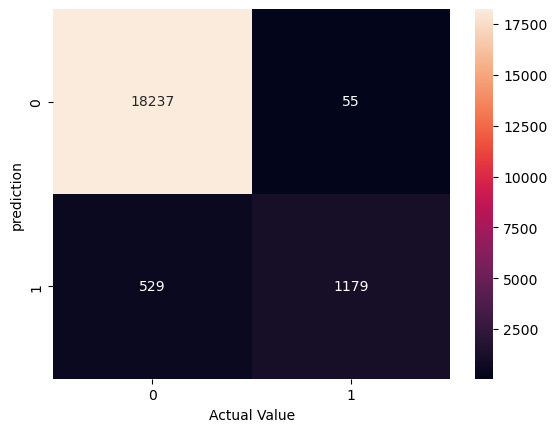

<-- K-Nearest Neighbors -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.90      0.62      0.74      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



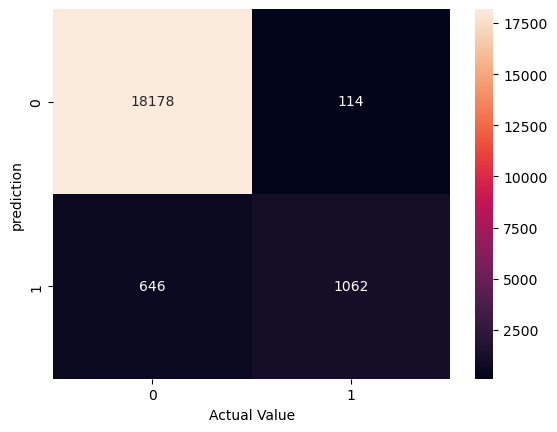

<-- SGD Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     18292
           1       0.88      0.49      0.63      1708

    accuracy                           0.95     20000
   macro avg       0.92      0.74      0.80     20000
weighted avg       0.95      0.95      0.94     20000



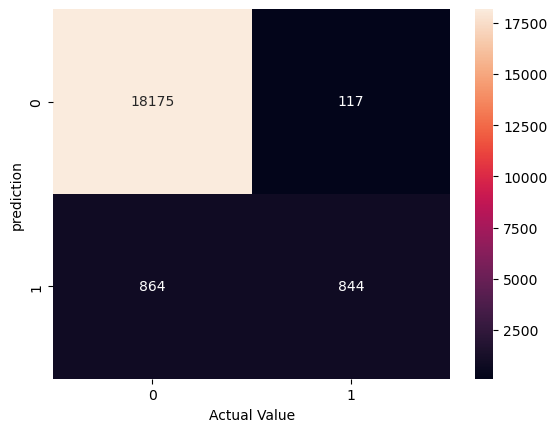

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



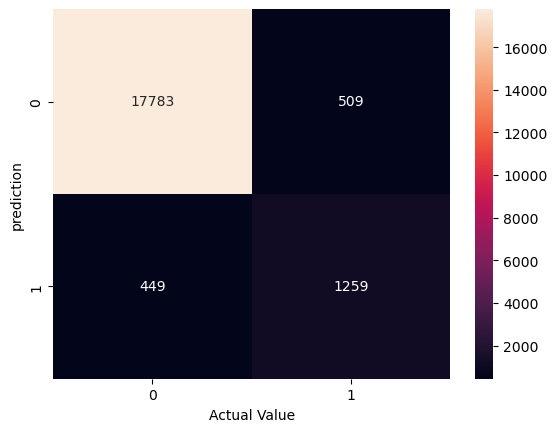

In [17]:
classifiers = [[XGBClassifier(random_state=42), 'XGB Classifier'],
               [LogisticRegression(random_state=42), 'Logistic Regression'],
               [RandomForestClassifier(random_state=42), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(random_state=42), 'SGD Classifier'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
              ]
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt="g")
    plt.ylabel("prediction")
    plt.xlabel("Actual Value")
    plt.show()

From the five models we can see that;
-                      Accuracy        Recall (1)   (0)
- XGB Classifier:        - 97%             - 69%       - 100%
- Logistic Regression:   - 95%             - 55%        - 99%
- Random Forest:              - 97%             - 69%         - 100%
- K-Nearest Neighbor:   - 96%            -  62%          - 99%
- SGD Classifier:              - 95%             - 49%          - 99%
- Decision Tree:             - 95%             - 74%          - 97%

The recall and Accuracy values for the Decision Tree are 95% and 74% respectively meanwhile the XGB Classifier and Random Forest are both 97% and 69% respectively, we further trained the models

#### Train model with Class_weights

<-- XGB Classifier -->


C:\Users\Helen Ojo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:44:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



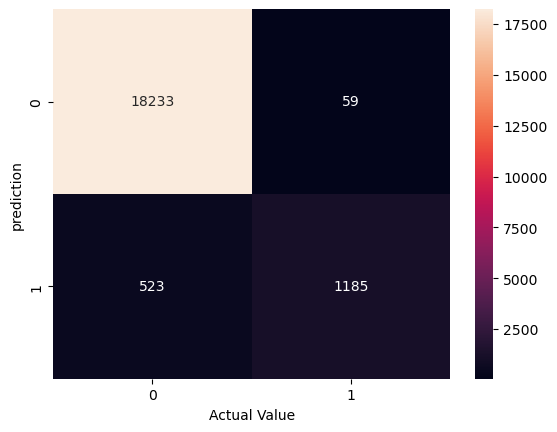

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     18292
           1       0.57      0.75      0.65      1708

    accuracy                           0.93     20000
   macro avg       0.77      0.85      0.80     20000
weighted avg       0.94      0.93      0.93     20000



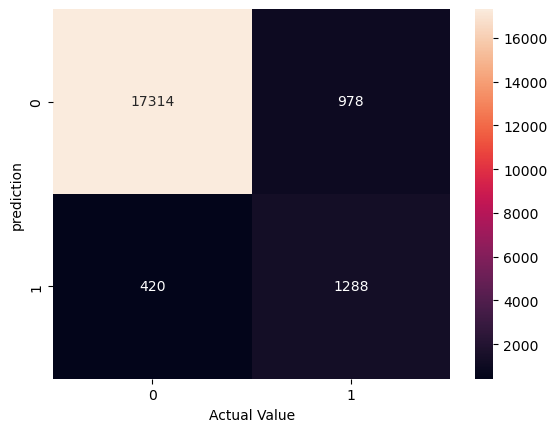

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



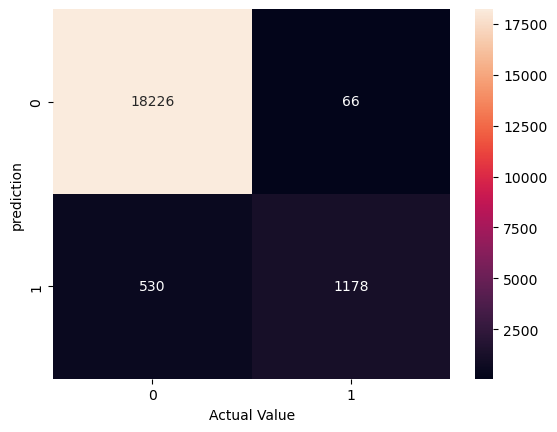

<-- SGD Classifier -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     18292
           1       0.55      0.77      0.64      1708

    accuracy                           0.93     20000
   macro avg       0.76      0.86      0.80     20000
weighted avg       0.94      0.93      0.93     20000



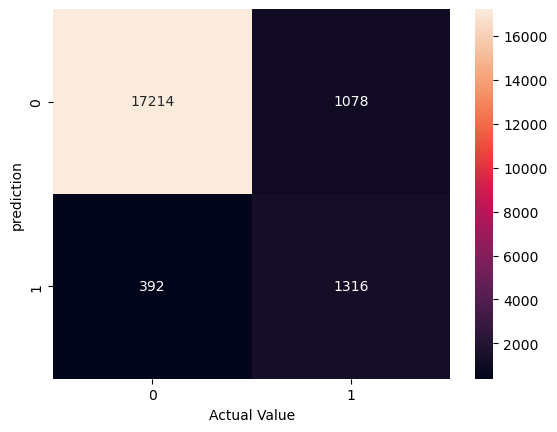

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.73      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



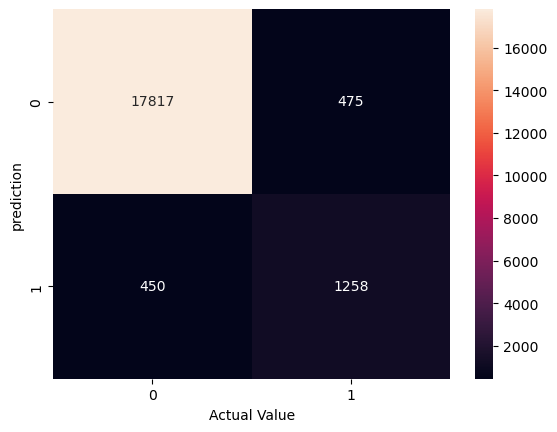

In [20]:
class_weights = {0:1, 1:4}

classifiers = [[XGBClassifier(random_state=42, class_weight=class_weights), 'XGB Classifier'],
               [LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifier'],
               [DecisionTreeClassifier(random_state = 42, class_weight=class_weights), 'Decision Tree'],
              ]
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt="g")
    plt.ylabel("prediction")
    plt.xlabel("Actual Value")
    plt.show()


After training with class weight;

                 Accuracy        Recall (1)   (0)
- XGB Classifier: - 97% - 69% - 100%
- Logistic Regression: - 93% - 75% - 95%
- Random Forest: - 97% - 69% - 100%
- SGD Classifier: - 93% - 77% - 94%
- Decision Tree: - 95% - 74% - 97%

The class weight was able to influence The Logistic Regression and SGD Classifier models other models' accuracy and recall remain unchanged 

#### Feature Importances

importances = classifiers[2][0].feature_importances_
importances

In [119]:
len(importances) == len(data1.columns)

True

In [120]:
feature_names = data1.columns
feature_importance_df = pd.DataFrame({'Feature':feature_names,'Importance': importances})
feature_importance_df

,Feature,Importance
0,gender,0.006951
1,age,0.103744
2,hypertension,0.014374
3,heart_disease,0.011138
4,smoking_history,0.028206
5,bmi,0.121991
6,HbA1c_level,0.380168
7,blood_glucose_level,0.333428


In [121]:
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,HbA1c_level,0.380168
7,blood_glucose_level,0.333428
5,bmi,0.121991
1,age,0.103744
4,smoking_history,0.028206
2,hypertension,0.014374
3,heart_disease,0.011138
0,gender,0.006951


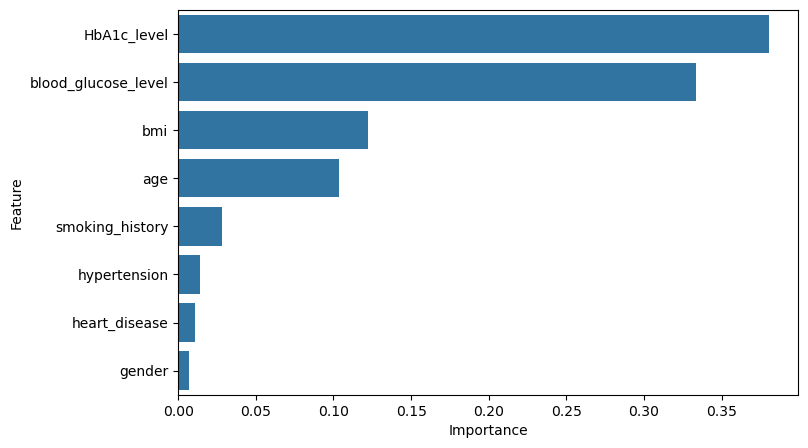

In [158]:
plt.figure(figsize = (8, 5))
sns.barplot(x='Importance', y='Feature', data= feature_importance_df);

In [123]:
# Select top 6 features
selected_features = feature_importance_df[:6]
selected_features

,Feature,Importance
6,HbA1c_level,0.380168
7,blood_glucose_level,0.333428
5,bmi,0.121991
1,age,0.103744
4,smoking_history,0.028206
2,hypertension,0.014374


#### Hyperparameter tuning 

In [126]:
param_grid = {
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [ 5, 7, 10],
    'class_weight': [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
}

grid_search = GridSearchCV(estimator=classifiers[2][0], param_grid=param_grid, cv=5, scoring="recall")
grid_search.fit(x_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'class_weight': {0: 1, 1: 4}, 'max_depth': 20, 'min_samples_split': 10}
Best Score: 0.72


#### Selection of best Model

In [127]:
grid_search.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=20,
                       min_samples_split=10, random_state=42)

### Best Random Forest Classifier Model ###
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.88      0.73      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.93      0.86      0.89     20000
weighted avg       0.97      0.97      0.97     20000



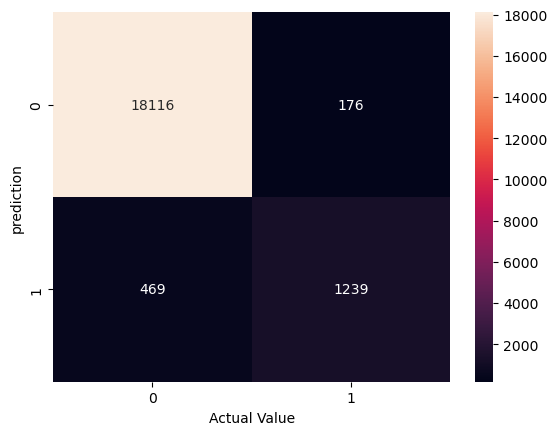

In [156]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)

# Display results
print("### Best Random Forest Classifier Model ###")
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.ylabel("prediction")
plt.xlabel("Actual Value")
plt.show()

Using hyperparameter Tuning for the model the Random Forest is better with recall score of 73%. From the metrics it is quite clear that the model is able to predict the diabetes quite effectively, with accuracy 97%.

#### Conclusion

From the exploratory data analysis, I have concluded that diabetes depends upon two factors which are the HbA1c level and Blood glucose level of the patient. BMI and Age play less significant roles in a patient having diabetes though diabetes is prominent in older years these can be a result of another factor.

The models performed pretty well, however, the Random Forest Classifier have excellent results with 97% accuracy.